# Taller 9

Integrantes:
 - Daniela Martínez Quiroga
 - María Isabella Rodríguez Arévalo

## Importar librerías

In [ ]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=aaf600187a32ca331f78df1b069ff67830a8b780d514d8c0d917868a7aadbdfe
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import silhouette_score, silhouette_samples
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Carga de datos

In [ ]:
df = pd.read_csv('Country-data.csv')
report = ProfileReport(df, title='Profiling Report')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 102.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

De acuerdo con el informe, no se encuentran datos faltantes o nulos, por lo tanto no se deben reemplazar ningún dato y se procede a escalar los datos al tener un rango amplio entre el dato mínimo y máximo en las variables. Se escoge escalar las variables en vez de normalizar ya que en su mayoría la distribución observada en las variables tienden a tener sesgo a la derecha o a la izquierda.

In [ ]:
df_scaler = df.drop(columns=['country'])
scaler = MinMaxScaler().fit(df_scaler)
print(f"scale: {scaler.scale_}")
scale = scaler.transform(df_scaler)
df_scaled = pd.DataFrame(scale, columns=df_scaler.columns)
df_scaled['country'] = df['country']
df_scaled

scale: [4.86854917e-03 5.00272649e-03 6.21504040e-02 5.74930390e-03
 8.03916682e-06 9.24129008e-03 1.97238659e-02 1.57728707e-01
 9.54480810e-06]


child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp              country  
0      0.475345   0.736593  0.003073          Afghanistan  
1      0.871795   0.078864  0.036833              Albania  
2      0.875740   0.274448  0.040365              Algeria  
3      0.552268   0.790221  0.031488               Angola  
4      0.881657   0.154574  0.114242  Antigua and Barbuda  
..          ...        ...       ...                  ...  
162    0.609467   0.370662  0.026143              Vanuatu  
163    0.854043   0.208202  0.126650            Venezuela  
164    0.808679   0.126183  0.010299              Vietnam  
165    0.698225   0.555205  0.010299                Yemen  
166    0.392505   0.670347  0.011731               Zambia  

[167 rows x 10 columns]

## Modelado con k-means

In [ ]:
inertias = []
centroids_list = []

X = df_scaled.drop(columns=['country'])

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    centroids_list.append(kmeans.cluster_centers_)
    print(f'K = {k}')
    print('Centroides:\n', kmeans.cluster_centers_)
    print('Inercia:', kmeans.inertia_)
    print('-' * 50)

K = 2
Centroides:
 [[0.0648944  0.23165798 0.32481623 0.27959735 0.17995717 0.09512402
  0.85293818 0.14939356 0.16801166]
 [0.42105313 0.14473182 0.27992054 0.24557475 0.0259766  0.14652065
  0.54368256 0.58882291 0.0158251 ]]
Inercia: 25.942443326223344
--------------------------------------------------
K = 3
Centroides:
 [[0.01088264 0.28914199 0.44196249 0.29131375 0.36819242 0.0628897
  0.95237267 0.09468361 0.41678415]
 [0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.0956586  0.20354231 0.27564776 0.27148825 0.09891936 0.1084663
  0.79913396 0.1787592  0.06301822]]
Inercia: 19.345622038883594
--------------------------------------------------
K = 4
Centroides:
 [[0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.01121337 0.23196852 0.45476052 0.2323752  0.35448084 0.06300354
  0.95037221 0.10033581 0.40415766]
 [0.0956586  0.20354231 0.27564776 0.27148825 0.09891936 

## Método del codo

El gráfico del método del codo muestra que el punto donde la inercia empieza a decrecer más lentamente (el codo de la curva) se encuentra en k = 3, a partir de ese punto, aumentar el número de clústeres no tiene beneficios en términos de reducción de inercia.

Por lo tanto el número de clústeres para el modelo final será 3, para evitar sobreajustar.

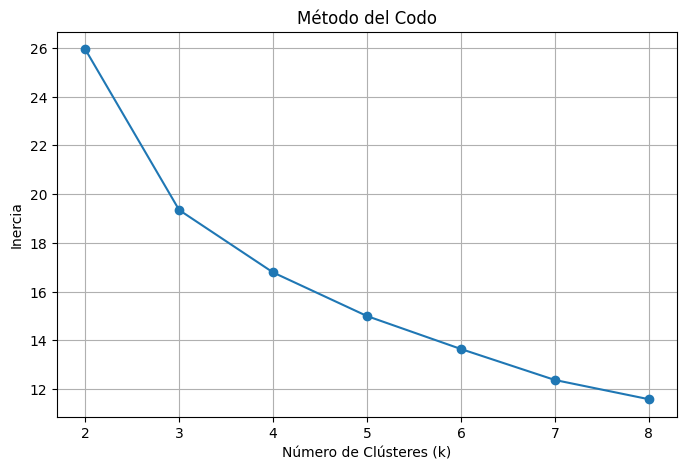

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## Modelo final

Con k = 3 se obtiene un valor de 0.34 de Silhouette Score promedio, indicando que el clúster es débil y se podría mejorar, pero el método del codo indica que k = 3 es el valor óptimo, lo que podría sugerir que k-means no es ideal para clasificar el presente dataset.

In [ ]:
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X)

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score promedio para k={k_opt}: {silhouette_avg:.2f}")

Silhouette Score promedio para k=3: 0.34


## Cluster de Colombia

Hay que tener en cuenta que el orden de las variables y su significado correspondiente según el diccionario es el siguiente:

1. child_mort: Muerte de niños menores de 5 años por cada 1000 nacidos vivos.
2. exports: Exportaciones de bienes y servicios. Expresadas como porcentaje del PIB total.
3. health: Gasto total en salud como porcentaje del PIB total.
4. imports: Importaciones de bienes y servicios. Expresadas como porcentaje del PIB total.
5. income: Ingreso neto por persona.
6. inflation: La medición de la tasa de crecimiento anual del PIB total.
7. life_expec: El número promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran iguales.
8. total_fer: El número de hijos que tendría cada mujer si las tasas actuales de fertilidad por edad se mantuvieran iguales.
9. gdpp: El PIB per cápita. Se calcula dividiendo el PIB total entre la población total.

A continuación se muestra una tabla comparativa de los centroides de cada cluster:

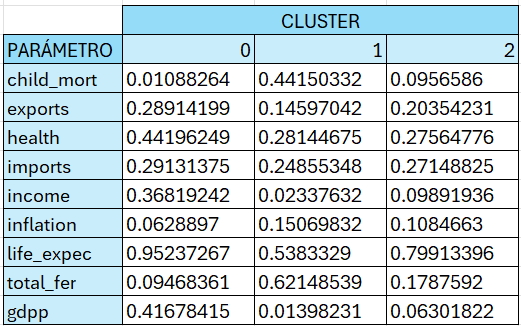

Se puede concluir lo siguiente:

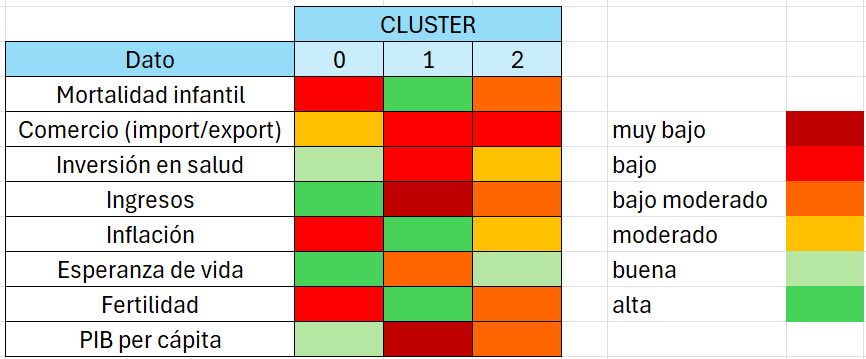

Colombia pertenece al cluster 2, países que se pueden considerar como en desarrollo emergente, que no están tan rezagados como el clúster 1, pero aún lejos de ser desarrollados.

In [ ]:
df_scaled['cluster'] = labels
colombia_cluster = df_scaled[df_scaled['country'] == 'Colombia']['cluster'].values[0]
print(f"Colombia pertenece al clúster: {colombia_cluster}")

Colombia pertenece al clúster: 2


## Árbol de decisión

En el árbol de decisión la variables en orden de prioridad son:

### 1
* child_mort: Muerte de niños menores de 5 años por cada 1000 nacidos vivos.

### 2
* gdpp: El PIB per cápita. Se calcula dividiendo el PIB total entre la población total.
* total_fer: El número de hijos que tendría cada mujer si las tasas actuales de fertilidad por edad se mantuvieran iguales.

### 3
* total_fer: El número de hijos que tendría cada mujer si las tasas actuales de fertilidad por edad se mantuvieran iguales.
* life_expec: El número promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran iguales.

Este resultado podría tener sentido si se compara con datos reales de Colombia.



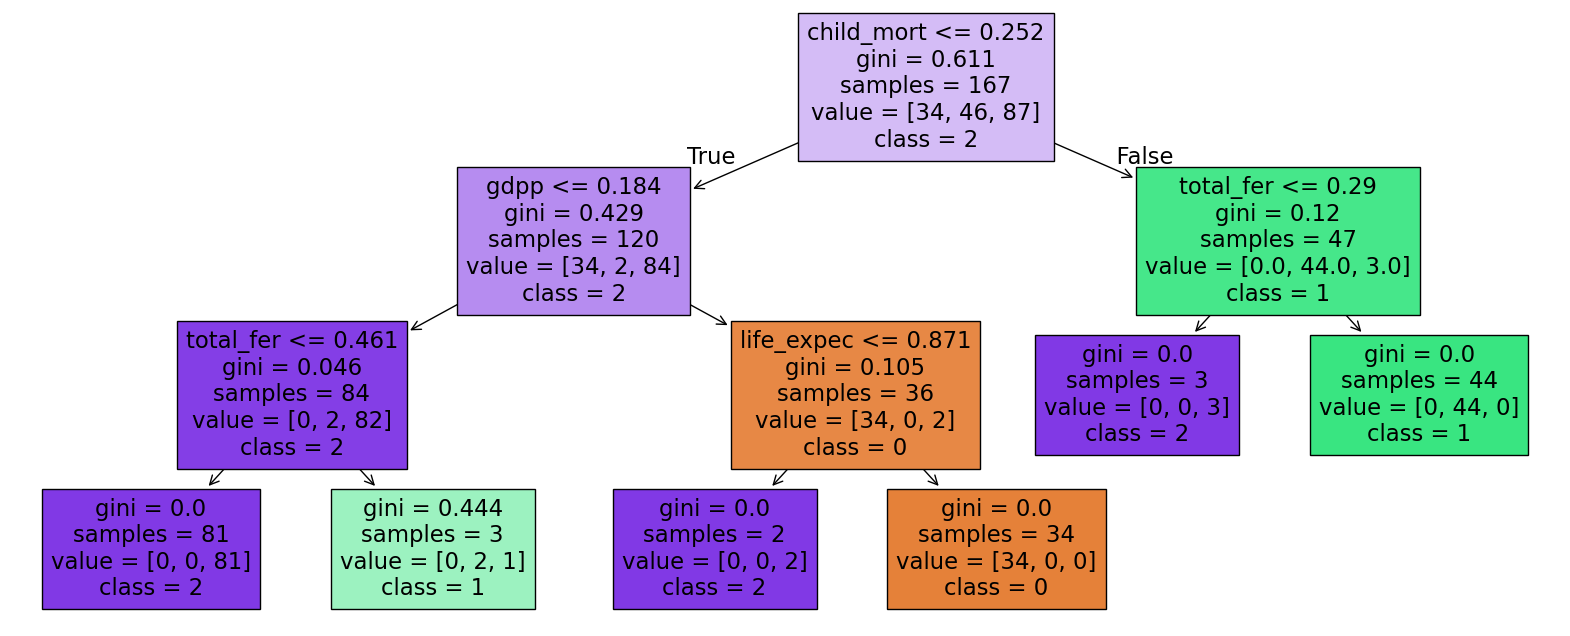

In [ ]:
X = df_scaled.drop(columns=['country', 'cluster'])
y = df_scaled['cluster']

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], filled=True)
plt.show()